<div style="background: #F0FAFF; border-radius: 3px; padding: 10px;">
<h1> This notebook walks us through how to compute a tuning curve  </h1>
    
A tuning curve summarizes a neuron's response to stimulus categories. Here we will look at the responses of a neuron to the 'Drifting Gratings' stimulus.

The Drifting Gratings stimulus consists of a sinusoidal grating that moves in 8 directions and at 5 temporal frequencies. Each stimulus condition (direction + temporal frequency combination) is repeated 15 times in random order. In addition, there are blanksweeps (when the grating is replaced with mean luminance gray) interleaved among the trials.

We will compute the mean response of a neuron to each of these stimulus conditions.

The data we will use are from the Allen Brain Observatory.  We have taken some data for a specific cell and saved it in the directory `data`.  We will not discuss general mechanisms of accessing Brain Observatory data here.  (For future reference, we will look at responses from the cell with `cell_id` 541513979.)
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<div style="background: #F0FAFF; border-radius: 3px; padding: 10px;">
In order to compute the tuning curve of the neuron, we need
<li>the activity of the neuron.  We will use the DF/F trace
<li>stimulus information for the drifting grating stimulus
 
We have stored the activity information in the arrays loaded below.

`dff_trace` contains the activity.  The index for this array is the acquisition frame number of the calcium recording.  Each acquisition frame corresonds to the clock time given in the `timestamps` array.  

</div>

In [2]:
timestamps = np.load('../data/timestamps.npy')
dff_trace = np.load('../data/dff_trace.npy')

<div style="background: #F0FAFF; border-radius: 3px; padding: 10px;">
It is always good to look at the data objects you're working with to make sure you understand what they are. What is the shape of the dff_trace array?

In [3]:
print(dff_trace.shape)
print(timestamps.shape)

(115741,)
(115741,)


<div style="background: #F0FAFF; border-radius: 3px; padding: 10px;">
Let's plot the DF/F trace of our neuron to see what it looks like

Text(0, 0.5, 'DF/F')

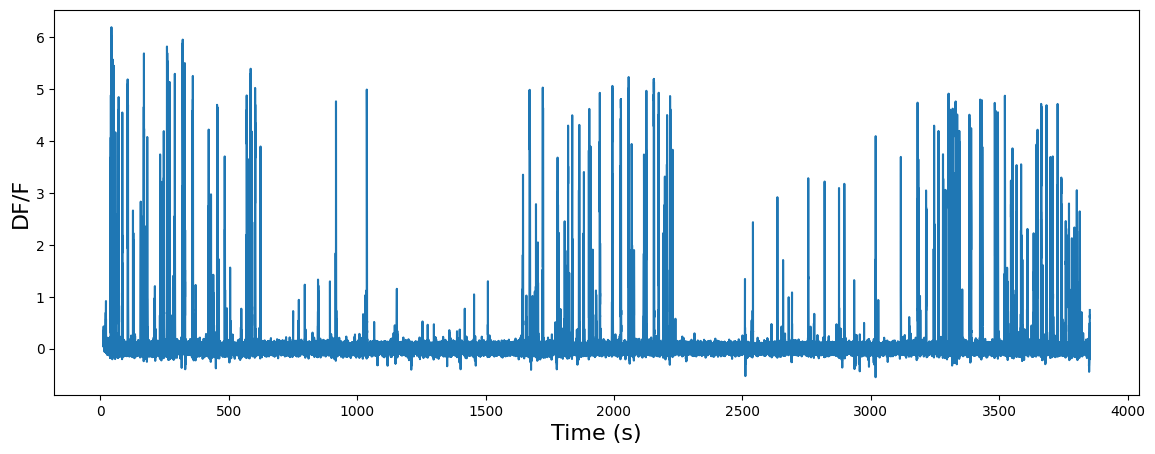

In [4]:
fig, ax = plt.subplots(figsize=(14,5))
ax.plot(timestamps, dff_trace)
ax.set_xlabel("Time (s)", fontsize=16)
ax.set_ylabel("DF/F", fontsize=16)

<div style="background: #F0FAFF; border-radius: 3px; padding: 10px;">
These are just the responses over the course of the experiment.  Let's look at what stimuli were used and when they were displayed.

In [5]:
stimulus = np.load('../data/stimulus.npy', allow_pickle=True)
epoch_frames = np.load('../data/epoch_frames.npy')

In [6]:
stimulus

array(['drifting_gratings', 'natural_movie_three', 'natural_movie_one',
       'drifting_gratings', 'spontaneous', 'natural_movie_three',
       'drifting_gratings'], dtype=object)

<div style="background: #F0FAFF; border-radius: 3px; padding: 10px;">
The `epoch_frames` array contains the acquisition frames at which each stimulus type starts and ends.  The first column is the start, the second column is the end.

In [7]:
print(epoch_frames)

[[   736  18810]
 [ 19746  37850]
 [ 38756  47807]
 [ 48712  66786]
 [ 66936  75868]
 [ 75869  93972]
 [ 94878 115485]]


<div style="background: #F0FAFF; border-radius: 3px; padding: 10px;">
Let's see how these correspond to each other.  We'll make use of the `enumerate` function.

In [8]:
for i, stim_name in enumerate(stimulus):
    print(i, ':  ', stim_name)

0 :   drifting_gratings
1 :   natural_movie_three
2 :   natural_movie_one
3 :   drifting_gratings
4 :   spontaneous
5 :   natural_movie_three
6 :   drifting_gratings


In [9]:
for i, stim_name in enumerate(stimulus):
    print(stim_name, ':\t', epoch_frames[i][0], ', ', epoch_frames[i][1])

drifting_gratings :	 736 ,  18810
natural_movie_three :	 19746 ,  37850
natural_movie_one :	 38756 ,  47807
drifting_gratings :	 48712 ,  66786
spontaneous :	 66936 ,  75868
natural_movie_three :	 75869 ,  93972
drifting_gratings :	 94878 ,  115485


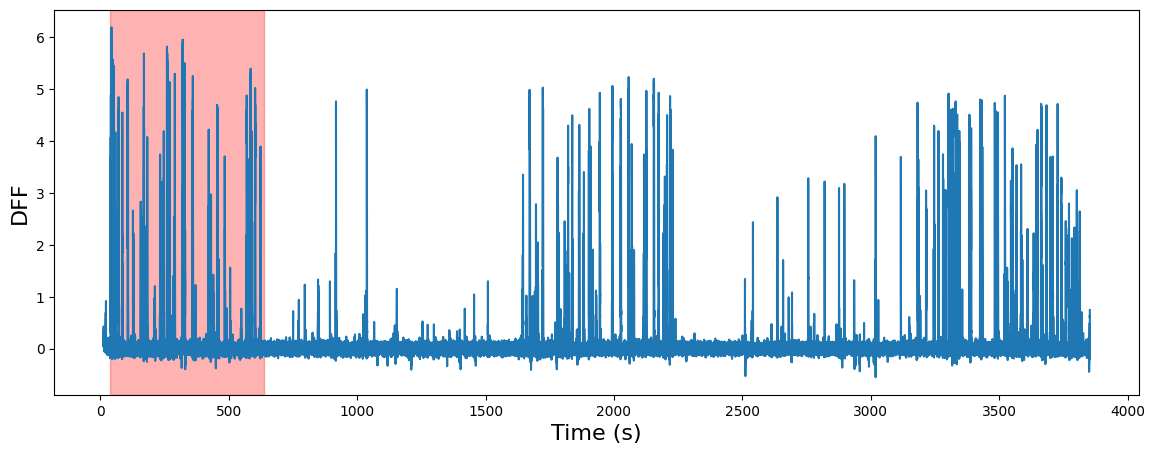

In [10]:
fig, ax = plt.subplots(figsize=(14,5))
ax.plot(timestamps, dff_trace)
ax.set_xlabel("Time (s)", fontsize=16)
ax.set_ylabel("DFF", fontsize=16)

start, end = epoch_frames[0]

ax.axvspan(timestamps[start], timestamps[end], color='red',alpha=0.3)

<div style="background: #F0FAFF; border-radius: 3px; padding: 10px;">
Let's define a dictionary to map color values to stimulus names.  We'll use this in the exercise below.

In [11]:
color_dict = {'drifting_gratings':  'red',
              'natural_movie_three': 'blue',
              'natural_movie_one': 'purple',
              'spontaneous': 'grey'}

**Exercise 1**:  Plot the DF/F trace of this neuron.  Shade the regions that correspond to each stimulus type shown using the colors defined in `color_dict` above.  (Hint:  Use the method `axvspan`, which can be called with either `plt.axvspan` or `ax.axvspan`.  Also, be aware that we are plotting versus the *timestamp*, not the acquisition frame.)

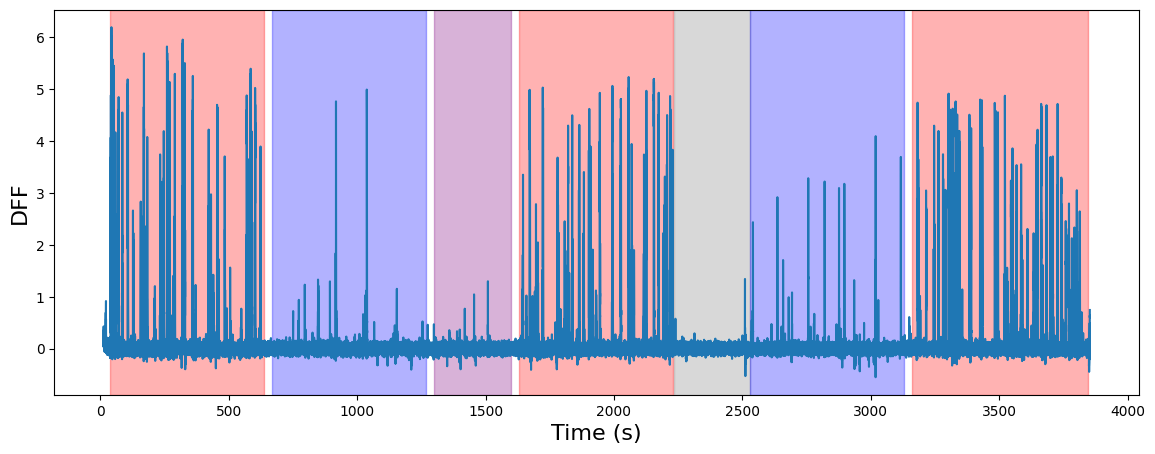

In [12]:
fig, ax = plt.subplots(figsize=(14,5))
ax.plot(timestamps, dff_trace)
ax.set_xlabel("Time (s)", fontsize=16)
ax.set_ylabel("DFF", fontsize=16)

for i, stim_name in enumerate(stimulus):
    start_frame, end_frame = epoch_frames[i]
    xmin = timestamps[start_frame]
    xmax = timestamps[end_frame]
    ax.axvspan(xmin, xmax, color=color_dict[stim_name], alpha=0.3)

<div style="background: #F0FAFF; border-radius: 3px; padding: 10px;">
It appears that this cell responds quite well to the drifting gratings stimulus.  We've stored the information for how the drifting gratings were displayed in the arrays below.  Each presentation is called a "trial".  For each trial, there is a direction and a temporal frequency for the grating.  Some trials correspond to blank sweeps when nothing is on the screen.  The `frames` array contains the start and end times for the display of that trial, similarly to the `epoch_frames` array.

In [13]:
temporal_frequency = np.load('../data/temporal_frequency.npy')
direction = np.load('../data/direction.npy')
blank_sweep = np.load('../data/blank_sweep.npy')
frames = np.load('../data/frames.npy')

<div style="background: #F0FAFF; border-radius: 3px; padding: 10px;">
Let's look at the direction array.

In [14]:
direction

array([ 45.,  90., 270.,  nan,  90., 270., 135., 270.,  45.,   0., 225.,
        90.,   0.,   0., 135., 225., 270.,   0., 225., 315., 180., 315.,
         0.,  90., 135.,  nan, 315., 180.,   0., 135., 270., 135., 135.,
         0.,   0., 180.,  45., 225., 180., 315., 270., 225., 135., 180.,
        90., 225., 135.,  90.,  90., 135.,   0., 135.,  45.,   0., 315.,
       180., 315., 180., 270., 225.,   0., 225.,  nan, 315.,  45., 270.,
       270.,  90., 315., 315., 270., 315., 315., 225.,  90., 180.,  90.,
        90.,  nan, 270., 135., 225.,  90., 135., 270.,   0., 315., 225.,
       180., 135., 315., 135., 315.,  nan,  90., 270., 270.,  90., 180.,
       315., 315., 225., 225., 135., 135., 315., 180., 270.,   0., 270.,
       315., 270., 315.,  45., 225., 315.,  45., 135., 315., 225.,   0.,
       180., 225., 225.,  45.,  45.,  45., 135., 270., 180., 180., 270.,
       180., 225.,  90., 315., 225., 135.,  45.,  90.,  45., 270., 315.,
       180., 135.,   0.,   0., 225., 180., 270.,  4

<div style="background: #F0FAFF; border-radius: 3px; padding: 10px;">
How many unique temporal frequencies and directions are there in this stimulus? Let's print the unique values for each of these parameters.

In [15]:
np.unique(direction)

array([  0.,  45.,  90., 135., 180., 225., 270., 315.,  nan],
      dtype=float32)

In [16]:
np.unique(temporal_frequency)

array([ 1.,  2.,  4.,  8., 15., nan], dtype=float32)

In [17]:
frames

array([[   736,    796],
       [   826,    886],
       [   917,    977],
       ...,
       [115244, 115304],
       [115334, 115394],
       [115425, 115485]])

<div style="background: #F0FAFF; border-radius: 3px; padding: 10px;">
    To look at the cell's response to a given grating presentation, let's plot the DF/F of the cell during the presentation of that grating.  We want to pad the plot with ~ 1 second of the DF/F trace preceding the grating presentation and ~1 after.  1 second = 30 frames.  We'll plot the response to the first grating presentation.

Text(0.5, 0, 'Frames')

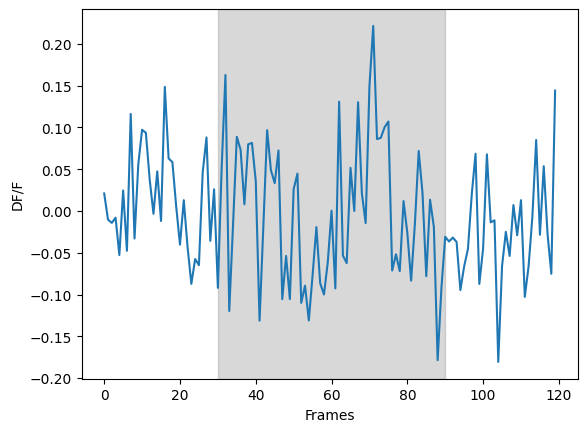

In [18]:
start, end = frames[0]

fig, ax = plt.subplots()
ax.plot(dff_trace[start-30:end+30])
ax.axvspan(30,30+end-start, color='gray', alpha=0.3) #this shades the period when the stimulus is being presented
ax.set_ylabel("DF/F")
ax.set_xlabel("Frames")

<div style="background: #F0FAFF; border-radius: 3px; padding: 10px;">
    We want to quantify this response. There are different methods of quantifying this that you can explore:
<li> mean DF/F during the grating presentation
<li> sum of the DF/F during the grating presentation (are these different?)
<li> maximum DF/F during grating</li>
<div style="background: #F0FAFF; border-radius: 3px; padding: 10px;">
Do you have other ideas for how to quantify this response? 
    
   

<div style="background: #F0FAFF; border-radius: 3px; padding: 10px;">
   For now let's use the mean DF/F during the presentation of the grating.  

In [19]:
dff_trace[start:end].mean()

-0.0020014683

**Exercise 2:** Repeat this for the next grating stimulus: plot the next trial and calculate the mean DF/F.

Text(0.5, 0, 'Frames')

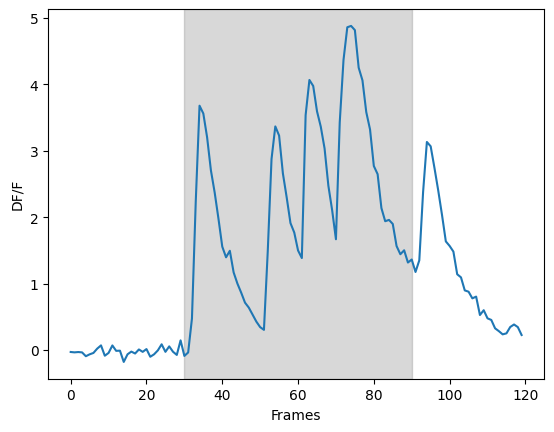

In [20]:
start, end = frames[1]

fig, ax = plt.subplots()
ax.plot(dff_trace[start-30:end+30])
ax.axvspan(30,30+end-start, color='gray', alpha=0.3) #this shades the period when the stimulus is being presented
ax.set_ylabel("DF/F")
ax.set_xlabel("Frames")

In [21]:
dff_trace[start:end].mean()

2.292613

<div style="background: #F0FAFF; border-radius: 3px; padding: 10px;">
Already we can see that some stimulus conditions elicit larger responses than others.  This is what we want to quantify and summarize in a <b>tuning curve</b>.
<p>To do this, let's calculate the mean DF/F for each grating presentation in this stimulus. To start, let's create a numpy array to hold our calculated responses for all of the trials. We'll have three columns, one for the stimulus direction, one for the stimulus temporal frequency, and the last for the cell's response. Then we need to iterate over all stimulus trials, populate the direction and TF and then calculate the mean response.
</div>

**Exercise 3**:  Create a numpy array containing the direction, temporal_frequency, and mean response for each trial.  

In [22]:
num_trials = len(direction)

cell_response= np.zeros((num_trials,3))

for i in range(num_trials):
    cell_response[i,0] = direction[i] 
    cell_response[i,1] = temporal_frequency[i] 
    start, end = frames[i]
    cell_response[i,2] = dff_trace[start:end].mean()   #mean response

In [23]:
cell_response

array([[ 4.50000000e+01,  1.00000000e+00, -2.00146833e-03],
       [ 9.00000000e+01,  1.50000000e+01,  2.29261303e+00],
       [ 2.70000000e+02,  1.00000000e+00,  4.73994493e+00],
       ...,
       [ 4.50000000e+01,  1.50000000e+01,  6.65871147e-03],
       [ 3.15000000e+02,  1.00000000e+00, -3.49607458e-03],
       [ 4.50000000e+01,  1.00000000e+00,  2.98597999e-02]])

<div style="background: #F0FAFF; border-radius: 3px; padding: 10px;">
If we only care about one stimulus parameter, we can quickly compare the response to that parameter, say the direction. Here we will plot each grating response as a function of the grating direction

**Exercise 4a**:  Plot the DF/F response for each trial against the direction for the drifting grating on that trial.

Text(0, 0.5, 'Mean DF/F')

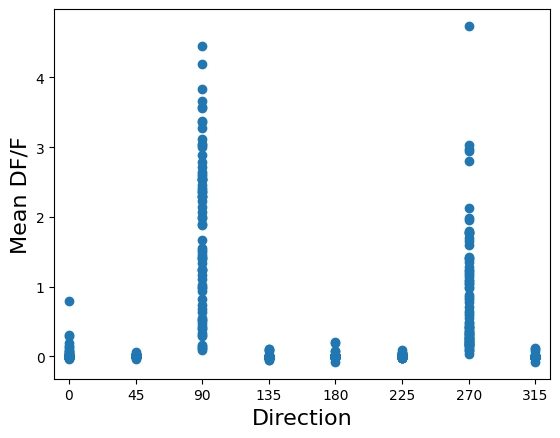

In [24]:
fig, ax = plt.subplots()

ax.plot(cell_response[:,0], cell_response[:,2], 'o')

ax.set_xticks(range(0,360,45))
ax.set_xlim(-10,325)
ax.set_xlabel("Direction", fontsize=16)
ax.set_ylabel("Mean DF/F", fontsize=16)

<div style="background: #F0FAFF; border-radius: 3px; padding: 10px;">
What do we see?
</div>

**Exercise 4b:** Repeat this for the temporal frequency parameter

Text(0, 0.5, 'Mean DF/F')

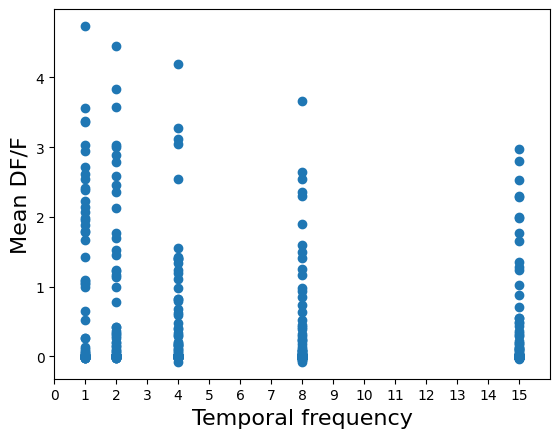

In [25]:
fig, ax = plt.subplots()

ax.plot(cell_response[:,1], cell_response[:,2], 'o')

ax.set_xticks(range(0,16))
ax.set_xlim(0,16)
ax.set_xlabel("Temporal frequency", fontsize=16)
ax.set_ylabel("Mean DF/F", fontsize=16)

<div style="background: #F0FAFF; border-radius: 3px; padding: 10px;">
We want to quantify this more explicitly.  So let's average all of the responses to each direction together. This is the mean DF/F response to an direction, for all temporal frequencies, for all trials.  To do this, we need a way of selecting the trials that correspond to a given direction  For example, for direction=270:

In [26]:
#Find the trials where the direction is 270
trial_mask = cell_response[:,0]==270

trial_mask

array([False, False,  True, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [27]:
#the mean DF/F of just those trials together
cell_response[trial_mask,2]

array([4.73994493, 3.03659916, 1.24012423, 1.27332604, 1.19315934,
       0.71215671, 0.31449616, 0.85542172, 0.5496676 , 1.69345915,
       0.12775335, 2.13003588, 2.97930574, 2.95171714, 1.95400441,
       0.16740675, 0.22578965, 1.40600502, 0.97928727, 0.28586724,
       1.05255663, 0.259179  , 0.02496267, 1.40127194, 1.09777248,
       1.35674107, 1.42936885, 1.65066755, 0.592709  , 0.19050689,
       0.10895046, 0.1592872 , 0.17949329, 0.35808772, 1.98680747,
       0.42055577, 0.08462939, 0.35712084, 1.78690374, 0.19504978,
       1.16880763, 0.33758387, 1.76276147, 0.24121755, 2.80577922,
       0.8161267 , 0.28872094, 0.77446914, 1.79436624, 0.98756999,
       0.08125166, 0.87787408, 0.17547697, 0.42519084, 0.3236354 ,
       1.14347255, 0.33133364, 0.26111722, 1.03526056, 0.41508484,
       0.2211097 , 0.48272476, 0.39182246, 0.44642076, 1.59690642,
       0.14981492, 0.22153836, 1.07720268, 0.26737064, 1.77009428,
       1.21624553, 0.61602563, 0.20547034, 0.49130696, 0.64344

In [28]:
#Average the mean DF/F of just those trials together
print("The mean response over all trials in response to stimuli with direction=270:")
cell_response[trial_mask,2].mean()

The mean response over all trials in response to stimuli with direction=270:


0.9247032543023427

<div style="background: #F0FAFF; border-radius: 3px; padding: 10px;">
Let's compute and plot the mean response as a function of direction (averaged across all temporal frequencies).   
<p> To start, we need to know what all the possible direction values are. We need to identify the <b>unique</b> values that are not NaNs (e.g. values that are <b>finite</b>)

In [29]:
all_dir = np.unique(cell_response[:,0])
print(all_dir)
dirvals = all_dir[np.isfinite(all_dir)]
print(dirvals)

[  0.  45.  90. 135. 180. 225. 270. 315.  nan]
[  0.  45.  90. 135. 180. 225. 270. 315.]


<div style="background: #F0FAFF; border-radius: 3px; padding: 10px;">
Now let's make an array with the average response of all trials for each of these directions.  We'll use `enumerate` again. 

**Exercise 5a**:  Compute and plot the tuning curve as a function of direction (averaged over temporal frequencies).  

Hint: start by creating an array with length equal to the number of directions, then use a for loop to compute the average response to each direction. 

In [30]:
tuning = np.empty((8))
for i, dirv in enumerate(dirvals):
    trial_mask = cell_response[:,0]==dirv
    tuning[i] = cell_response[trial_mask,2].mean()

<div style="background: #F0FAFF; border-radius: 3px; padding: 10px;">
Let's plot this tuning curve of mean response vs direction.

Text(0, 0.5, 'Mean DF/F')

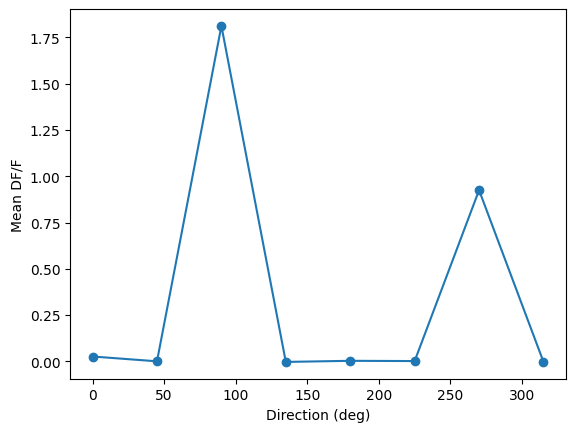

In [31]:
fig, ax = plt.subplots()

ax.plot(dirvals, tuning, 'o-')
ax.set_xlabel("Direction (deg)")
ax.set_ylabel("Mean DF/F")

**Exercise 5b:** Compute and plot the mean response as a function of temporal frequency (averaged across all directions).

In [32]:
all_tf = np.unique(cell_response[:,1])
tfvals = all_tf[np.isfinite(all_tf)]
print(tfvals)

[ 1.  2.  4.  8. 15.]


In [33]:
tuning_tf = np.empty((5))
for i, tf in enumerate(tfvals):
    trial_mask = cell_response[:,1]==tf
    tuning_tf[i] = cell_response[trial_mask,2].mean()

Text(0, 0.5, 'Mean DF/F')

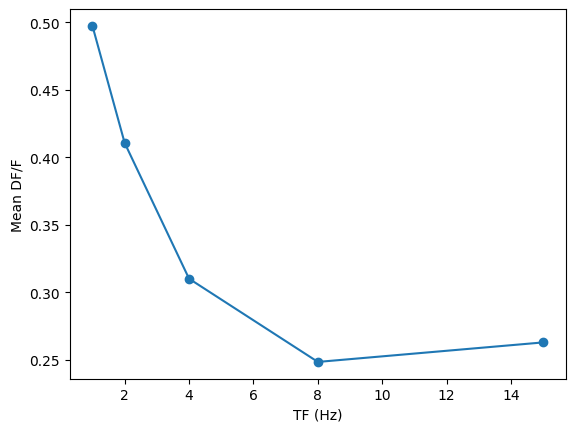

In [34]:
fig, ax = plt.subplots()

ax.plot(tfvals, tuning_tf, 'o-')
ax.set_xlabel("TF (Hz)")
ax.set_ylabel("Mean DF/F")

<div style="background: #F0FAFF; border-radius: 3px; padding: 10px;">
Compare these curves with the plots we made above of all the trials. What do we see now?
</div>

**Exercise 6:** Add errorbars to the above tuning curves. They can be standard deviation or standard error or the mean. 

Make a new array for the tuning values with two columns - one for the mean response and one for the error you decide to use.  (Hint:  the standard deviation can be computed with a method call `std` in the same way you compute the mean with a method called `mean`.)
    
<p>(Hint: for plotting, <b>plt.errorbar</b> will be useful).

In [35]:
? plt.errorbar

Signature:
 plt.errorbar(
    x: 'float | ArrayLike',
    y: 'float | ArrayLike',
    yerr: 'float | ArrayLike | None' = None,
    xerr: 'float | ArrayLike | None' = None,
    fmt: 'str' = '',
    ecolor: 'ColorType | None' = None,
    elinewidth: 'float | None' = None,
    capsize: 'float | None' = None,
    barsabove: 'bool' = False,
    lolims: 'bool | ArrayLike' = False,
    uplims: 'bool | ArrayLike' = False,
    xlolims: 'bool | ArrayLike' = False,
    xuplims: 'bool | ArrayLike' = False,
    errorevery: 'int | tuple[int, int]' = 1,
    capthick: 'float | None' = None,
    *,
    data=None,
    **kwargs,
) -> 'ErrorbarContainer'
Docstring:
Plot y versus x as lines and/or markers with attached errorbars.

*x*, *y* define the data locations, *xerr*, *yerr* define the errorbar
sizes. By default, this draws the data markers/lines as well as the
errorbars. Use fmt='none' to draw errorbars without any data markers.

.. versionadded:: 3.7
   Caps and error lines are drawn in polar coord

In [36]:
tuning_dir = np.empty((8,2))
for i, dirv in enumerate(dirvals):
    trial_mask = cell_response[:,0]==dirv
    tuning_dir[i,0] = cell_response[trial_mask,2].mean()
    tuning_dir[i,1] = cell_response[trial_mask,2].std()

Text(0, 0.5, 'Mean DF/F')

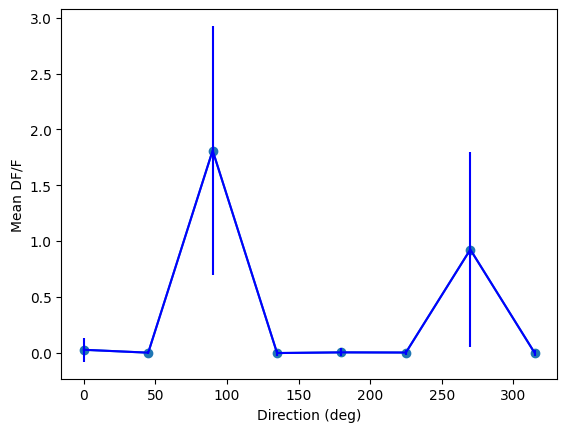

In [37]:
fig, ax = plt.subplots()

ax.plot(dirvals, tuning_dir[:,0], 'o-')
ax.errorbar(dirvals, tuning_dir[:,0], yerr=tuning_dir[:,1], color='b')

ax.set_xlabel("Direction (deg)")
ax.set_ylabel("Mean DF/F")

In [38]:
tuning_tf = np.empty((5,2))
for i, tf in enumerate(tfvals):
    trial_mask = cell_response[:,1]==tf
    tuning_tf[i,0] = cell_response[trial_mask,2].mean()
    tuning_tf[i,1] = cell_response[trial_mask,2].std()

Text(0, 0.5, 'Mean DF/F')

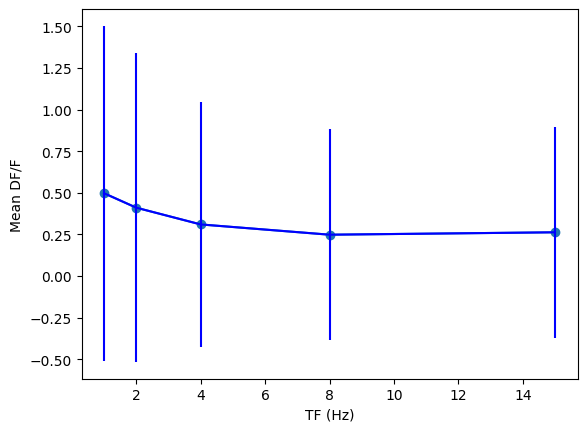

In [39]:
fig, ax = plt.subplots()

ax.plot(tfvals, tuning_tf[:,0], 'o-')
ax.errorbar(tfvals, tuning_tf[:,0], yerr=tuning_tf[:,1], color='b')
ax.set_xlabel("TF (Hz)")
ax.set_ylabel("Mean DF/F")

**Exercise 7a:** Add a black line showing the mean response to the blank sweep.
<br>(Hint 1: You can use the `blank_sweep` array to find the trials with a blank sweep.  Hint 2: <b>plt.axhline</b> is a useful function for adding a horizontal line).

In [40]:
blank_response = cell_response[blank_sweep==1, 2].mean()
blank_response

0.019221892748991477

Text(0, 0.5, 'Mean DF/F')

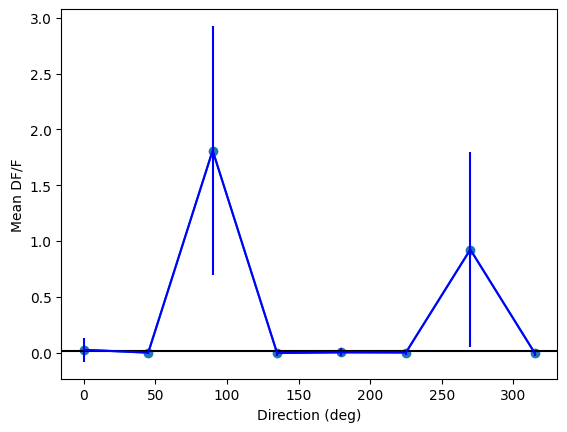

In [41]:
fig, ax = plt.subplots()

ax.plot(dirvals, tuning_dir[:,0], 'o-')
ax.errorbar(dirvals, tuning_dir[:,0], yerr=tuning_dir[:,1], color='b')

ax.axhline(blank_response, color='k')

ax.set_xlabel("Direction (deg)")
ax.set_ylabel("Mean DF/F")

Why is it important to add these two features?

**Exercise 7b:** Add the errorbars and blank sweep response to the temporal frequency plot as well

Text(0, 0.5, 'Mean DF/F')

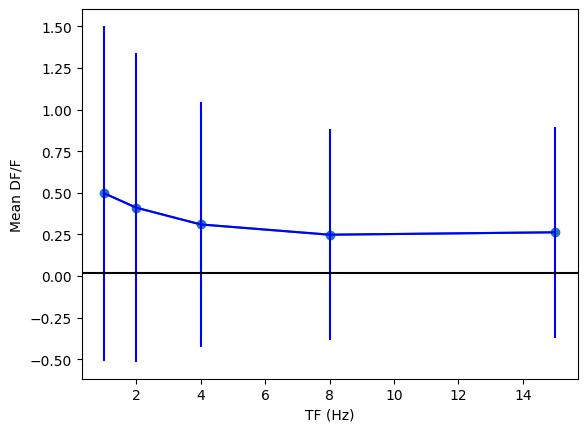

In [42]:
fig, ax = plt.subplots()

ax.plot(tfvals, tuning_tf[:,0], 'o-')
ax.errorbar(tfvals, tuning_tf[:,0], yerr=tuning_tf[:,1], color='b')

ax.axhline(blank_response, color='k')

ax.set_xlabel("TF (Hz)")
ax.set_ylabel("Mean DF/F")

<div style="background: #F0FAFF; border-radius: 3px; padding: 10px;">
So far we've looked at one stimulus dimension (e.g. direction) averaged across all conditions of the other (e.g. temporal frequency) - and vice versa. Now we want to look at these tuning curves for both dimensions.
<p>To begin, let's compute the two-dimensional tuning array for this neuron - computing the mean response for every possible direction and temporal frequency combination.
<p>What is the shape of the array we will be computing?

In [43]:
tuning_array = np.empty((8,5))


for i,tf in enumerate(tfvals):
    #select trials of each tf
    tf_trials = cell_response[:,1]==tf
    subset = cell_response[tf_trials]
    for j,dirv in enumerate(dirvals):
        #select trials of that tf and each direction
        trials = subset[:,0]==dirv
        tuning_array[j,i] = subset[trials,2].mean()

<div style="background: #F0FAFF; border-radius: 3px; padding: 10px;">
Let's start by visualizing this similarly to how we did above: Plot the direction tuning curve for each temporal frequency value as a separate line:

Text(0, 0.5, 'Mean DF/F')

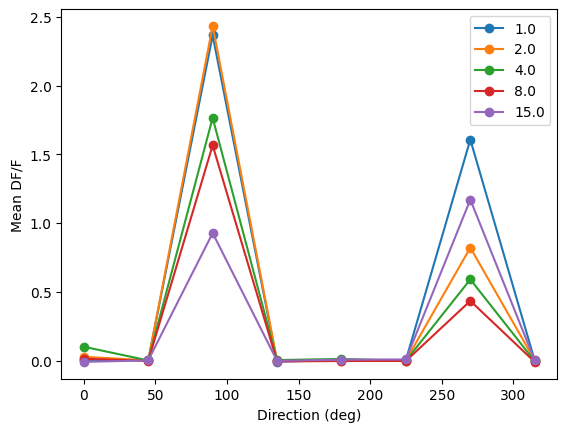

In [44]:
fig, ax = plt.subplots()

for i, tf in enumerate(tfvals):
    ax.plot(dirvals, tuning_array[:,i], 'o-', label=tf)
ax.legend()
ax.set_xlabel("Direction (deg)")
ax.set_ylabel("Mean DF/F")


**Exercise 9:** Plot each temporal frequency tuning curve for each direction as a separate line.

Text(0, 0.5, 'Mean DF/F')

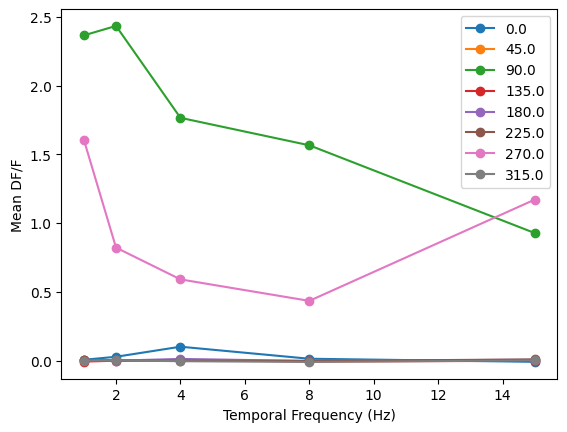

In [45]:
fig, ax = plt.subplots()

for i, dirv in enumerate(dirvals):
    ax.plot(tfvals, tuning_array[i,:], 'o-', label=dirv)
ax.legend()
ax.set_xlabel("Temporal Frequency (Hz)")
ax.set_ylabel("Mean DF/F")

<div style="background: #F0FAFF; border-radius: 3px; padding: 10px;">
What do we see here?
<p>Another way to visualize two dimensional data is as a heatmap. Let's use <b>plt.imshow</b> to create this heatmap.</p>

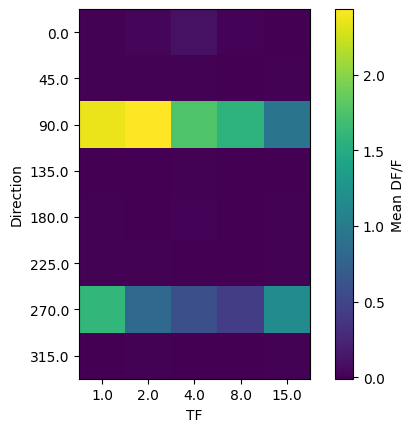

In [46]:
fig, ax = plt.subplots()

im = ax.imshow(tuning_array)
ax.set_xticks(range(5), tfvals)
ax.set_yticks(range(8), dirvals)
ax.set_xlabel("TF")
ax.set_ylabel("Direction")
cbar = plt.colorbar(im) #Add the colorbar so we know what the colors mean
cbar.set_label("Mean DF/F")

 <div style="background: #F0FAFF; border-radius: 3px; padding: 10px;">
<p>This visualization gives us a great view of how the two dimensions interact, but one disadvantage is that we can't add errorbars or even the blank sweep response to this. But we saw that that information can be important for interpreting what we see in the data.
<p>One approach we can take is to compute the <b>z score</b> where each response is mean subtracted and normalized to the standard deviation. So it shows how far each response deviates from the mean response (rather than the blanksweep response as we plotted above in exercise 5).

In [47]:
tuning_array_z = (tuning_array - tuning_array.mean())/tuning_array.std()

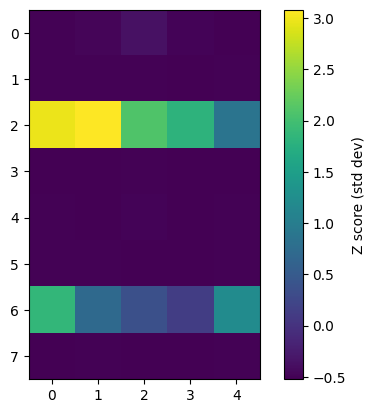

In [48]:
fig, ax = plt.subplots()

im = ax.imshow(tuning_array_z)
cbar = plt.colorbar(im) #Add the colorbar so we know what the colors mean
cbar.set_label("Z score (std dev)")